In [1]:
!pip install findspark

In [2]:
import findspark

In [3]:
findspark.init("C:\spark")

In [4]:
from pyspark import SparkContext

In [5]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf

In [6]:
spark = SparkSession.builder \
    .master("local") \
    .appName("pypspark_giris") \
    .getOrCreate()

sc=spark.sparkContext

In [7]:
sc

<SparkContext master=local appName=pypspark_giris>

In [8]:
spark_df = spark.read.csv("churn.csv",header=True,inferSchema =True)

In [9]:
spark_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Churn: integer (nullable = true)



In [10]:
type(spark_df)

pyspark.sql.dataframe.DataFrame

In [11]:
spark_df.cache()

DataFrame[_c0: int, Names: string, Age: double, Total_Purchase: double, Account_Manager: int, Years: double, Num_Sites: double, Churn: int]

In [12]:
spark_df.head()

Row(_c0=0, Names='Cameron Williams', Age=42.0, Total_Purchase=11066.8, Account_Manager=0, Years=7.22, Num_Sites=8.0, Churn=1)

In [13]:
spark_df.dtypes

[('_c0', 'int'),
 ('Names', 'string'),
 ('Age', 'double'),
 ('Total_Purchase', 'double'),
 ('Account_Manager', 'int'),
 ('Years', 'double'),
 ('Num_Sites', 'double'),
 ('Churn', 'int')]

In [14]:
spark_df.show(5,truncate=True)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [15]:
spark_df.columns

['_c0',
 'Names',
 'Age',
 'Total_Purchase',
 'Account_Manager',
 'Years',
 'Num_Sites',
 'Churn']

In [16]:
spark_df.describe().show()

+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|summary|               _c0|        Names|              Age|   Total_Purchase|   Account_Manager|            Years|         Num_Sites|              Churn|
+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|  count|               900|          900|              900|              900|               900|              900|               900|                900|
|   mean|             449.5|         null|41.81666666666667|10062.82403333334|0.4811111111111111| 5.27315555555555| 8.587777777777777|0.16666666666666666|
| stddev|259.95191863111916|         null|6.127560416916251|2408.644531858096|0.4999208935073339|1.274449013194616|1.7648355920350969| 0.3728852122772358|
|    min|                 0|   Aaron King|             22.0|          

In [17]:
spark_df.describe("Age").show()

+-------+-----------------+
|summary|              Age|
+-------+-----------------+
|  count|              900|
|   mean|41.81666666666667|
| stddev|6.127560416916251|
|    min|             22.0|
|    max|             65.0|
+-------+-----------------+



In [18]:
spark_df.select("Age","Names").show()

+----+-------------------+
| Age|              Names|
+----+-------------------+
|42.0|   Cameron Williams|
|41.0|      Kevin Mueller|
|38.0|        Eric Lozano|
|42.0|      Phillip White|
|37.0|     Cynthia Norton|
|48.0|   Jessica Williams|
|44.0|        Eric Butler|
|32.0|      Zachary Walsh|
|43.0|        Ashlee Carr|
|40.0|     Jennifer Lynch|
|30.0|       Paula Harris|
|45.0|     Bruce Phillips|
|45.0|       Craig Garner|
|40.0|       Nicole Olson|
|41.0|     Harold Griffin|
|38.0|       James Wright|
|45.0|      Doris Wilkins|
|43.0|Katherine Carpenter|
|53.0|     Lindsay Martin|
|46.0|        Kathy Curry|
+----+-------------------+
only showing top 20 rows



In [19]:
spark_df.filter(spark_df.Age > 40).count()

524

In [20]:
spark_df.groupby("Churn").count().show()

+-----+-----+
|Churn|count|
+-----+-----+
|    1|  150|
|    0|  750|
+-----+-----+



In [21]:
spark_df.groupby("Churn").agg({"Age" : "mean"}).show()

+-----+-----------------+
|Churn|         avg(Age)|
+-----+-----------------+
|    1|42.99333333333333|
|    0|41.58133333333333|
+-----+-----------------+



SQL işlemleri

In [22]:
spark_df.createOrReplaceTempView("tbl_df")

In [23]:
spark.sql("show tables").show()

+---------+---------+-----------+
|namespace|tableName|isTemporary|
+---------+---------+-----------+
|         |   tbl_df|       true|
+---------+---------+-----------+



In [24]:
spark.sql("select Age from tbl_df").show(5)

+----+
| Age|
+----+
|42.0|
|41.0|
|38.0|
|42.0|
|37.0|
+----+
only showing top 5 rows



In [25]:
spark.sql("select Churn, mean(Age) from tbl_df group by Churn").show()

+-----+-----------------+
|Churn|        mean(Age)|
+-----+-----------------+
|    1|42.99333333333333|
|    0|41.58133333333333|
+-----+-----------------+



veri görselleştirme

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
sdf = spark_df.toPandas()

In [28]:
sdf.head()

,_c0,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
0,0,Cameron Williams,42.0,11066.80,0,7.22,8.0,1
1,1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,1
2,2,Eric Lozano,38.0,12884.75,0,6.67,12.0,1
3,3,Phillip White,42.0,8010.76,0,6.71,10.0,1
4,4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,1


<AxesSubplot:xlabel='Churn'>

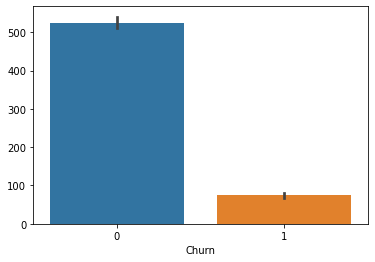

In [29]:
sns.barplot(x="Churn",y=sdf.Churn.index ,data=sdf)

In [30]:
spark_df.show(5)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [31]:
spark_df = spark_df.toDF(*[c.lower() for c in spark_df.columns])

In [32]:
spark_df.show(5)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           names| age|total_purchase|account_manager|years|num_sites|churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [33]:
spark_df = spark_df.withColumnRenamed("_c0","index")

In [34]:
spark_df.show(5)

+-----+----------------+----+--------------+---------------+-----+---------+-----+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|    3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|    4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [35]:
spark_df.select("age","total_purchase","account_manager","years","num_sites","churn").describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
age,900,41.81666666666667,6.127560416916251,22.0,65.0
total_purchase,900,10062.82403333334,2408.644531858096,100.0,18026.01
account_manager,900,0.4811111111111111,0.4999208935073339,0,1
years,900,5.27315555555555,1.274449013194616,1.0,9.15
num_sites,900,8.587777777777777,1.7648355920350969,3.0,14.0
churn,900,0.16666666666666666,0.3728852122772358,0,1


In [36]:
spark_df = spark_df.dropna()

In [37]:
spark_df = spark_df.withColumn("age_kare",spark_df.age**2)

In [38]:
spark_df.show(3)

+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|age_kare|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|  1764.0|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|  1681.0|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|  1444.0|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+
only showing top 3 rows



In [39]:
#bağımlı değişkeni belirtme

In [40]:
from pyspark.ml.feature import StringIndexer

In [41]:
stringIndexer = StringIndexer(inputCol="churn",outputCol="label")
model=stringIndexer.fit(spark_df)
indexed = model.transform(spark_df)
spark_df=indexed.withColumn("label",indexed["label"].cast("integer"))

In [42]:
spark_df.show(5)

+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+-----+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|age_kare|label|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+-----+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|  1764.0|    1|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|  1681.0|    1|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|  1444.0|    1|
|    3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|  1764.0|    1|
|    4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|  1369.0|    1|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+-----+
only showing top 5 rows



In [43]:
#bağımsız değişkenler

In [44]:
from pyspark.ml.feature import VectorAssembler

In [45]:
spark_df.columns

['index',
 'names',
 'age',
 'total_purchase',
 'account_manager',
 'years',
 'num_sites',
 'churn',
 'age_kare',
 'label']

In [46]:
bagımsız_degisle = ["age","total_purchase","account_manager","years","num_sites"]

In [47]:
vectorAssembler = VectorAssembler(inputCols=bagımsız_degisle,outputCol="features")
va_df= vectorAssembler.transform(spark_df)

In [48]:
va_df.show(5)

+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+-----+--------------------+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|age_kare|label|            features|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+-----+--------------------+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|  1764.0|    1|[42.0,11066.8,0.0...|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|  1681.0|    1|[41.0,11916.22,0....|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|  1444.0|    1|[38.0,12884.75,0....|
|    3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|  1764.0|    1|[42.0,8010.76,0.0...|
|    4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|  1369.0|    1|[37.0,9191.58,0.0...|
+-----+----------------+----+--------------+----

In [49]:
final_df = va_df.select(["features","label"])

In [50]:
final_df.show(5)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[42.0,11066.8,0.0...|    1|
|[41.0,11916.22,0....|    1|
|[38.0,12884.75,0....|    1|
|[42.0,8010.76,0.0...|    1|
|[37.0,9191.58,0.0...|    1|
+--------------------+-----+
only showing top 5 rows



In [51]:
#test-train

In [52]:
splits= final_df.randomSplit([0.70,0.30])
train_df=splits[0]
test_df=splits[1]

In [53]:
train_df

DataFrame[features: vector, label: int]

In [54]:
#gbm ile müşteri terk modeelmesi

In [55]:
from pyspark.ml.classification import GBTClassifier

In [56]:
gbm= GBTClassifier(maxIter=10,featuresCol="features",labelCol="label")

In [57]:
gbm_model = gbm.fit(train_df)

In [58]:
sc

<SparkContext master=local appName=pypspark_giris>

In [59]:
y_pred = gbm_model.transform(test_df)

In [60]:
ac= y_pred.select("label","prediction")

In [61]:
ac.filter(ac.label == ac.prediction).count()/ac.count()

0.8768115942028986

In [62]:
#model tuning

In [63]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

evaluator = BinaryClassificationEvaluator()

paramGrid= (ParamGridBuilder()
            .addGrid(gbm.maxDepth,[2,4,6])
            .addGrid(gbm.maxBins,[20,30])
            .addGrid(gbm.maxIter,[10,20])
            .build())
cv =CrossValidator(estimator=gbm,estimatorParamMaps=paramGrid,evaluator=evaluator,numFolds=10)

In [64]:
cvModel= cv.fit(train_df)

In [65]:
y_pred =cvModel.transform(test_df)

In [66]:
ac = y_pred.select("label","prediction")

In [67]:
ac.filter(ac.label == ac.prediction).count()/ac.count()

0.894927536231884

In [68]:
#yeni müşteri terk eder mi etmez mi?

In [79]:
import pandas as pd

names =pd.Series(["Ali Ahmetoğlu","Taner Gün","Berkay","Polat Konak","Kamil Atasoy"])
age=pd.Series([38,43,34,50,40])
total_purchase= pd.Series([3000,1000,6000,3000,10000])
account_manager=pd.Series([1,0,0,1,1])
years=pd.Series([20,10,3,8,30])
num_sites=pd.Series([30,8,8,6,50])

yeni_musteriler= pd.DataFrame({"names":names,
                                "age":age,
                                "total_purchase":total_purchase,
                                "account_manager":account_manager,
                                "years":years,
                                "num_sites":num_sites})

In [80]:
yeni_musteriler.columns

Index(['names', 'age', 'total_purchase', 'account_manager', 'years',
       'num_sites'],
      dtype='object')

In [81]:
yeni_sdf = spark.createDataFrame(yeni_musteriler)

In [82]:
yeni_sdf.show()

+-------------+---+--------------+---------------+-----+---------+
|        names|age|total_purchase|account_manager|years|num_sites|
+-------------+---+--------------+---------------+-----+---------+
|Ali Ahmetoğlu| 38|          3000|              1|   20|       30|
|    Taner Gün| 43|          1000|              0|   10|        8|
|       Berkay| 34|          6000|              0|    3|        8|
|  Polat Konak| 50|          3000|              1|    8|        6|
| Kamil Atasoy| 40|         10000|              1|   30|       50|
+-------------+---+--------------+---------------+-----+---------+



In [83]:
yeni_müsteriler = vectorAssembler.transform(yeni_sdf)

In [86]:
results = cvModel.transform(yeni_müsteriler)

In [89]:
results.select("names","prediction").show()

+-------------+----------+
|        names|prediction|
+-------------+----------+
|Ali Ahmetoğlu|       1.0|
|    Taner Gün|       0.0|
|       Berkay|       0.0|
|  Polat Konak|       0.0|
| Kamil Atasoy|       1.0|
+-------------+----------+

